# B-Spline

In [1]:
# Based on the notes
# INTEREST RATES AND FX MODELS: 1. LIBOR and OIS
# by Andrew Lesniewski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

from bspline import BSpline

A B-spline of degree $d\geq 0$ is a function $f(t)$ of the form
$$
    f(t) = \sum_{-\infty \leq k \leq \infty} f_k B_k ^{(d)}(t)
$$

Where we define, for a sequence of knot points $\{t_k\}_{- \infty \leq k \leq \infty}$

$$B_k^{(0)}(t) =
    \begin{cases}
    1 & t_k \leq t < t_{k+1} \\
    0 & \text{otherwise}
    \end{cases}
$$

And, recursively, for $d\geq 1$,
$$
   B_k^{(d)}(t) = \frac{t - t_k}{t_{k+d} - t_k} B_k^{(d-1)}(t) + \frac{t_{k+d+1} - t}{t_{k+d+1} - t_{k+1}} B_{k+1}^{(d-1)}(t)
$$

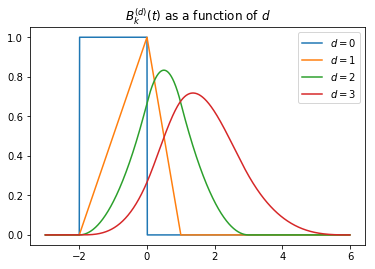

In [2]:
knots = np.array([-3, -2, 0, 1, 3, 6])
T = np.arange(-3, 6, 0.01)

bspline = BSpline(knots, 3)
for d in range(4):
    plt.plot(T, bspline.eval(T, 1, d), label="$d={}$".format(d))
    
plt.legend()
plt.title(r"$B_k^{(d)}(t)$ as a function of $d$")
plt.show()

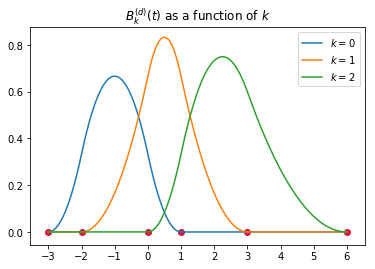

In [3]:
degree = 2
bs1 = BSpline(knots, degree)

for k in range(3):
    plt.plot(T, bs1.eval(T, k), label="$k={}$".format(k))
plt.scatter(bs1.knots, np.zeros(len(bs1.knots)), c="crimson")
plt.legend()
plt.xticks(range(-3,7))
plt.title(r"$B_k^{(d)}(t)$ as a function of $k$")
plt.show()

#### B-Spline Derivative
For the derivative we have the following recursion
$$
    \frac{d}{dt}B_{d}^{k}(t) = \frac{d}{t_{k+d} - t_k}B_{d-1}^{k}(t) - \frac{d}{t_{k+d+1} - t_{k+1}}B_{d-1}^{k+1}(t)
$$



In [4]:
bspline.diff(1, 1)

0.23333333333333331

#### B-Spline Integration
The integral from $-\infty$ to $t$ can be expressed in terms of a sum as follows:
$$
    \int_{-\infty}^{t} B_k^{(d)}(s) ds = \sum_{i=k}^{\infty}\frac{t_{k+d+1}- t_k}{d + 1}B_i^{(d+1)}(t)
$$

Where we require at least $d + 2$ knot points greater than or equal to $t$

In [5]:
knots = np.array([-3, -2, 0, 1, 3, 6])
bspline.integrate(0, 1)

0.90208333333333346

### Playing with B-Splines
If we have $6$ knots, modifying $f_k$ for all $k=0,\ldots, 5$ creates an instance of
$$
f(t) = \sum_{k} f_k B_k ^{(d)}(t)
$$

In [6]:
from ipywidgets import interact, FloatSlider
from numpy import vectorize

@vectorize
def BSpline_Eval(x, *args):
    coefs = args
    return np.sum([coefs[ix] * bspline.eval(x, k, out_bounds_eval=True)
                   for ix, k in enumerate(bspline.knots)])

def plot_bspline(**kwargs):
    args = list(kwargs.values())
    X = np.linspace(-3, 5)
    Y = BSpline_Eval(X, *args)
    plt.plot(X, Y)
    plt.show()

In [7]:
interact(plot_bspline,
         a0 = FloatSlider(value=1, min=-1, max=2, step=0.1),
         a1 = FloatSlider(value=1, min=-1, max=2, step=0.1),
         a2 = FloatSlider(value=1, min=-1, max=2, step=0.1),
         a3 = FloatSlider(value=1, min=-1, max=2, step=0.1),
         a4 = FloatSlider(value=1, min=-1, max=2, step=0.1),
         a5 = FloatSlider(value=1, min=-1, max=2, step=0.1))

<function __main__.plot_bspline>

# Curve construction by B-splines ﬁtting